In [ ]:
!pip install matplotlib

In [ ]:
X = [0.349526784, 1.6974435, 5.384308891, 2.044150596,
     4.578814506, 3.241690807, 2.535931731, 2.210580888,
     3.397474351, 5.972933146, 5.114704101]

Y = [0.254020646, 0.790556868, -0.81239532, 1.012143475,
     -0.904558188, -0.167456361, 0.482547054, 0.878514378,
     -0.210093715, -0.128786937, -0.866501299]

<h1>問題１<h1>

Text(0.5, 1.0, 'Graph of sin function')

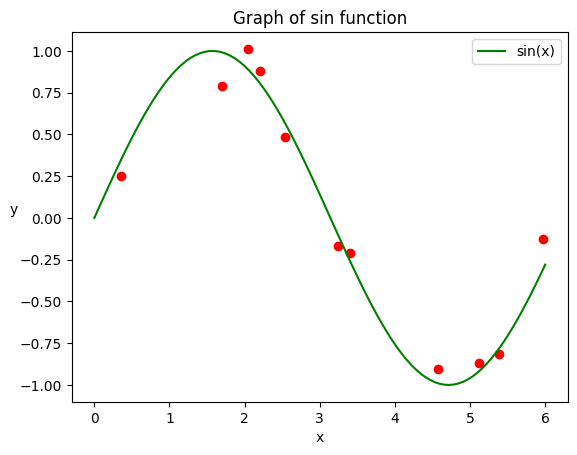

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X,Y,color = 'red')
x_sin = np.linspace(0,6,100)
plt.plot(x_sin,np.sin(x_sin),color = 'green',label = 'sin(x)')
plt.xlabel('x')
plt.ylabel('y',rotation=0)
plt.legend()
plt.title('Graph of sin function')
plt.show()

<h1>問題２<h1>

In [ ]:
def cubic(a, b, c, d, x):
  return a*x**3 + b*x**2 + c*x + d

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lr = 0.000008
epoch = 200_000

a = 0
b = 0
c = 0
d = 0
for e in range(epoch):
  grad_a = 0
  grad_b = 0
  grad_c = 0
  grad_d = 0
  loss = 0

  for i in range(len(X)):
    x = X[i]
    y = Y[i]
    grad_a = grad_a - 2 * x**3 * (y - a*x**3 - b*x**2 - c*x - d)
    grad_b = grad_b - 2 * x**2 * (y - a*x**3 - b*x**2 - c*x - d)
    grad_c = grad_c - 2 * x * (y - a*x**3 - b*x**2 - c*x - d)
    grad_d = grad_d - 2 * (y - a*x**3 - b*x**2 - c*x - d)
    loss = loss + (y - a*x**3 - b*x**2 -c*x - d)**2

  a = a - lr * grad_a
  b = b - lr * grad_b
  c = c - lr * grad_c
  d = d - lr * grad_d

  print('epoch:', e, 'a:', a, 'b:', b, 'c:', c, 'd', d, 'loss:', loss)

Streaming output truncated to the last 5000 lines.
epoch: 195000 a: 0.0714190719757346 b: -0.6512327306343354 c: 1.2479347400789218 d 0.28852555517751804 loss: 0.3578473356949281
epoch: 195001 a: 0.07141916860897557 b: -0.6512337019420937 c: 1.2479375217366409 d 0.28852347558982566 loss: 0.3578457088022125
epoch: 195002 a: 0.07141926524186792 b: -0.6512346732464732 c: 1.247940303385342 d 0.28852139600782123 loss: 0.357844081919554
epoch: 195003 a: 0.0714193618744116 b: -0.651235644547474 c: 1.2479430850250255 d 0.28851931643150475 loss: 0.3578424550469524
epoch: 195004 a: 0.07141945850660668 b: -0.651236615845096 c: 1.247945866655691 d 0.2885172368608762 loss: 0.35784082818440943
epoch: 195005 a: 0.07141955513845312 b: -0.6512375871393392 c: 1.247948648277339 d 0.28851515729593563 loss: 0.35783920133192093
epoch: 195006 a: 0.07141965176995092 b: -0.6512385584302037 c: 1.2479514298899694 d 0.28851307773668305 loss: 0.35783757448949105
epoch: 195007 a: 0.07141974840110007 b: -0.651239529

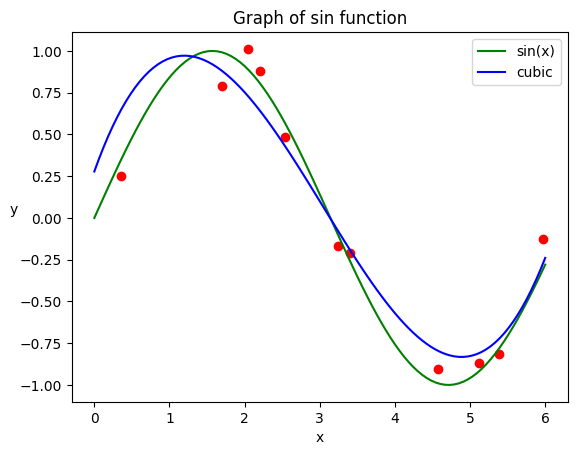

In [ ]:
plt.scatter(X,Y,color = 'red')
x_sin = np.linspace(0,6,100)
plt.plot(x_sin,np.sin(x_sin),color = 'green',label = 'sin(x)')
plt.plot(x_sin,cubic(a,b,c,d,x_sin),color = 'blue',label = 'cubic')
plt.xlabel('x')
plt.ylabel('y',rotation=0)
plt.legend()
plt.title('Graph of sin function')
plt.show()

<h1>問題３<h1>

In [ ]:
#問題３a
import numpy as np
import matplotlib.pyplot as plt
X3 = []
for x in X:
  X3 = X3 + [[1, x, x**2, x**3]]

X3 = np.array(X3)
Y3 = np.array([Y]).T

Z1 = np.matmul(X3.T, X3)
Z2 = np.linalg.inv(Z1)
Z3 = np.matmul(Z2, X3.T)
w = np.matmul(Z3, Y3)
print(w)

def cubic_new(x):
  return w[3][0]*x**3 +w[2][0]*x**2 +w[1][0]*x +w[0][0]


[[-0.39107398]
 [ 2.14476398]
 [-0.96239957]
 [ 0.10226822]]


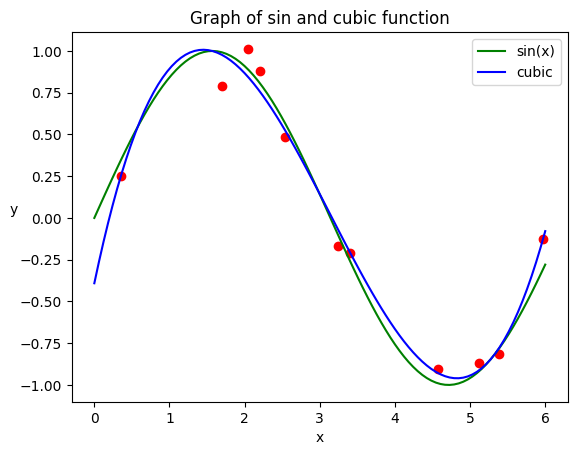

In [ ]:
plt.scatter(X,Y,color = 'red')
x_sin = np.linspace(0,6,100)
plt.plot(x_sin,np.sin(x_sin),color = 'green',label = 'sin(x)')
plt.plot(x_sin,cubic_new(x_sin),color = 'blue',label = 'cubic')
plt.xlabel('x')
plt.ylabel('y',rotation=0)
plt.legend()
plt.title('Graph of sin and cubic functions')
plt.show()

In [ ]:
#問題３b
X_ = np.array(X)
Y_ = np.array(Y)
A = np.vstack([np.ones(len(X_)), X_**1, X_**2, X_**3, X_**4, X_**5, X_**6, X_**7, X_**8, X_**9]).T
w = np.linalg.lstsq(A, Y_, rcond = None)[0]

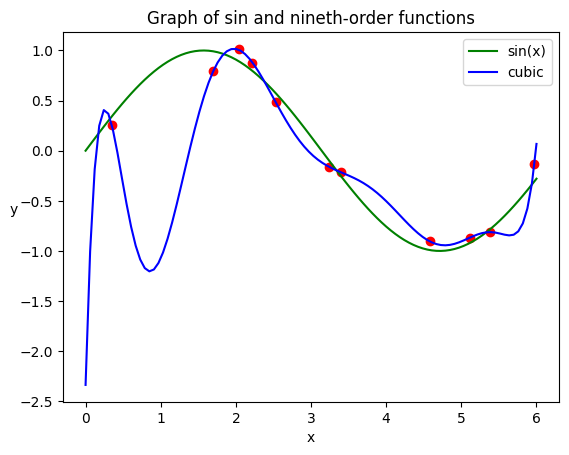

In [ ]:
plt.scatter(X,Y,color = 'red')
x_sin = np.linspace(0,6,100)
y_sin = w[0] + w[1]*x_sin + w[2]*x_sin**2 + w[3]*x_sin**3 + w[4]*x_sin**4 + w[5]*x_sin**5 + w[6]*x_sin**6 + w[7]*x_sin**7\
        + w[8]*x_sin**8 + w[9]*x_sin**9
plt.plot(x_sin,np.sin(x_sin),color = 'green',label = 'sin(x)')
plt.plot(x_sin,y_sin,color = 'blue',label = 'cubic')
plt.xlabel('x')
plt.ylabel('y',rotation=0)
plt.legend()
plt.title('Graph of sin and nineth-order functions')
plt.show()